In [2]:
!pip install opencv-python
!pip install matplotlib
!pip install pandas
!pip install imageio

In [3]:
#Laden der Videos und Speicherung der Bilder 
import cv2
import os
path="/home/dl4/Video_Frames/video_data"
#schleife durchläuft alle videos
for i in range (0,105):
    #die Methode cv2.VideoCapture greift auf die einzelnen Videos zu
    vidcap = cv2.VideoCapture('/home/dl4/Videos/_8Vy3dlHg2w_00'+str(i).zfill(3)+'.mp4')
    #Vicap.read() prüft, ob das Bild des Videos geladen ist und gibt die aktuelle Bilddatei zurück
    success, image = vidcap.read()
    count = 1
    #erstellt pro Video ein Ordner
    os.makedirs('Video_Frames/video_data'+str(i))
    #Alle Bilder werden geladen und gespeichert

    while success:
        cv2.imwrite('Video_Frames/video_data'+str(i)+'/image_'+str(count)+'_'+str(i)+'.jpg',image)
        success, image = vidcap.read()
        print('Saved image ', count)
        count += 1


Saved image  1
Saved image  2
Saved image  3
Saved image  4
Saved image  5
Saved image  6
Saved image  7
Saved image  8
Saved image  9
Saved image  10
Saved image  11
Saved image  12
Saved image  13
Saved image  14
Saved image  15
Saved image  16
Saved image  17
Saved image  18
Saved image  19
Saved image  20
Saved image  21
Saved image  22
Saved image  23
Saved image  24
Saved image  25
Saved image  26
Saved image  27
Saved image  28
Saved image  29
Saved image  30
Saved image  31
Saved image  32
Saved image  33
Saved image  34
Saved image  35
Saved image  36
Saved image  37
Saved image  38
Saved image  39
Saved image  40
Saved image  41
Saved image  42
Saved image  43
Saved image  44
Saved image  45
Saved image  46
Saved image  47
Saved image  48
Saved image  49
Saved image  50
Saved image  51
Saved image  52
Saved image  53
Saved image  54
Saved image  55
Saved image  56
Saved image  57
Saved image  58
Saved image  59
Saved image  60
Saved image  61
Saved image  62
Saved image  63
S

In [188]:
#Speicherung der gelabelten Trainings-Daten CSV-Datein in einem Dataframe
import pandas as pd
df = pd.read_csv("/home/dl4/Labels/Video_Camera_Labeling_All.csv", sep=";")
print(df)
df = df.rename(columns={"ID" : "ID","NameOfFile" : "video", "Camera Position (Side/Front/Upwards/Downwards)" : "cam_pos"})
print(df)

      ID         NameOfFile Camera Position (Side/Front/Upwards/Downwards)  \
0      0  _8Vy3dlHg2w_00000                                           Side   
1      1  _8Vy3dlHg2w_00001                                        Upwards   
2      2  _8Vy3dlHg2w_00002                                          Front   
3      3  _8Vy3dlHg2w_00003                                           Side   
4      4  _8Vy3dlHg2w_00004                                      Downwards   
..   ...                ...                                            ...   
100  100  _8Vy3dlHg2w_00100                                          Front   
101  101  _8Vy3dlHg2w_00101                                           Side   
102  102  _8Vy3dlHg2w_00102                                           Side   
103  103  _8Vy3dlHg2w_00103                                          Front   
104  104  _8Vy3dlHg2w_00104                                           Side   

     Out  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN

In [189]:
print(df.shape)
for i in range(df.shape[0]):
    df["video"][i] = "video_data" + str(df["ID"][i])

(105, 4)


<ipython-input-189-d5703e76c1bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["video"][i] = "video_data" + str(df["ID"][i])


In [6]:
#Hinzufügen der Kameraposition zu den Videonamen

directory = "/home/dl4/Video_Frames/"

for filename in os.listdir(directory):
    print(filename)
    if filename in df.video.values:
        cam = df.loc[df['video'] == filename]["cam_pos"]
        cam = cam.iloc[0]
        print(filename + "_" + cam)
        os.rename(directory + filename, directory + filename + "_" + cam)
        

video_data103_Front
video_data18_Side
video_data51_Side
video_data69_Side
video_data30_Side
video_data6_Side
video_data0_Side
video_data7_Front
video_data56_Side
video_data9_Side
video_data28_Side
video_data21_Side
video_data97_Front
video_data81_Upwards
video_data68_Downwards
video_data8_Side
video_data104_Side
video_data89_Side
video_data86_Downwards
video_data98_Side
video_data17_Side
video_data16_Upwards
video_data77_Side
video_data66_Front
video_data59_Downwards
video_data90_Front
video_data22_Downwards
video_data65_Upwards
video_data50_Side
video_data91_Side
video_data93_Downwards
video_data43_Side
video_data63_Side
video_data74_Downwards
video_data62_Side
video_data84_Side
video_data67_Side
video_data10_Side
video_data60_Side
video_data102_Side
video_data35_Upwards
video_data41_Side
video_data71_Front
video_data101_Side
video_data31_Front
video_data12_Side
video_data27_Side
video_data88_Front
video_data100_Front
video_data26_Front
video_data45_Downwards
video_data55_Front
video_

In [251]:
#Initialisierung des Dictionary und Befüllung mit Videonamen + der dazugehörigen Frameanzahl
#Ausgabe der Anzahl der Bilder und den jeweiligen Ansichten

fileNames=[]
for g in range(0,105):
    fileNames.append(glob.glob('/home/dl4/Video_Frames/video_data'+str(g)+'_*'))

video_frames={}
count_all=0
count_front=0
count_side=0
count_downwards=0
count_upwards=0

for i in range(0,105): 
    count=0 
    x = os.listdir(fileNames[i][0]) 
    for j in x: 
        if j.endswith(".jpg"): 
            count+=1 
            count_all+=1
    if "Front" in fileNames[i][0]:
        position = "Front"
        count_front+=count
    elif "Side" in fileNames[i][0]:
        position = "Side"
        count_side+=count
    elif "Downwards" in fileNames[i][0]:
        position = "Downwards"
        count_downwards+=count
    else:
        position = "Upwards"
        count_upwards+=count
    
    video_frames['video'+str(i)]=count 

print('\n', 'Anzahl aller Bilder: ' + str(count_all),'\n', 'Anzahl Side-Bilder: ' + str(count_side),
      '\n', 'Anzahl Front-Bilder: ' + str(count_front),'\n', 'Anzahl Upwards-Bilder: ' + str(count_upwards),
      '\n', 'Anzahl Downwards-Bilder: ' + str(count_downwards))
print('\n',video_frames)








 Anzahl aller Bilder: 8949 
 Anzahl Side-Bilder: 4868 
 Anzahl Front-Bilder: 2573 
 Anzahl Upwards-Bilder: 401 
 Anzahl Downwards-Bilder: 1107

 {'video0': 76, 'video1': 88, 'video2': 89, 'video3': 95, 'video4': 87, 'video5': 76, 'video6': 45, 'video7': 87, 'video8': 112, 'video9': 88, 'video10': 67, 'video11': 103, 'video12': 65, 'video13': 56, 'video14': 88, 'video15': 59, 'video16': 58, 'video17': 95, 'video18': 48, 'video19': 85, 'video20': 92, 'video21': 50, 'video22': 67, 'video23': 104, 'video24': 87, 'video25': 68, 'video26': 82, 'video27': 60, 'video28': 88, 'video29': 79, 'video30': 61, 'video31': 103, 'video32': 127, 'video33': 93, 'video34': 66, 'video35': 71, 'video36': 69, 'video37': 101, 'video38': 90, 'video39': 77, 'video40': 60, 'video41': 87, 'video42': 69, 'video43': 128, 'video44': 192, 'video45': 71, 'video46': 95, 'video47': 37, 'video48': 49, 'video49': 43, 'video50': 96, 'video51': 76, 'video52': 82, 'video53': 113, 'video54': 102, 'video55': 90, 'video56': 11

          frames position
video8       112     Side
video11      103    Front
video23      104     Side
video31      103    Front
video32      127     Side
video37      101    Front
video43      128     Side
video44      192     Side
video53      113    Front
video54      102     Side
video56      110     Side
video60      130     Side
video61      240    Front
video62      129     Side
video66      101    Front
video67      110     Side
video72      105     Side
video75      110    Front
video76      149     Side
video82      116     Side
video83      122    Front
video84      139     Side
video88      132    Front
video91      114     Side
video94      105    Front
video98      101     Side
video100     111    Front
video101     138     Side
video104     108     Side


<AxesSubplot:xlabel='position', ylabel='frames'>

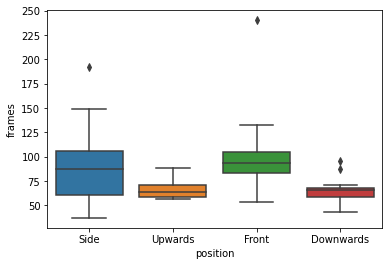

In [258]:
import seaborn as sns
import pandas as pd

#Visiualiserung der Verteilung der Frames

df_videos= pd.DataFrame.from_dict(video_frames,orient='index',columns=['frames'])
df_videos["position"]=df["cam_pos"].values

print(df_videos.loc[lambda df_videos: df_videos['frames'] > 100])

sns.boxplot(y='frames', x='position',data=df_videos)


#Aufrund der unterschiedlichen Videolängen ist die Frameanzahl sehr gestreut


254
921600


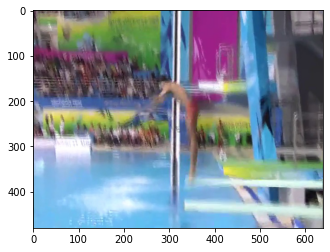

In [10]:
#Ausgabe eines zufälligen Bildes
import imageio as ig
import matplotlib.pyplot as plt



plt.imshow(ig.imread('/home/dl4/Video_Frames/video_data0_Side/image_20_0.jpg'))
test=ig.imread('/home/dl4/Video_Frames/video_data0_Side/image_20_0.jpg')
test.shape
#Blauwert von Pixel x=200 ,y =400 ausgeben
print(test[400,200,2])
